# Proyek Analisis Data: E-Commerce Dataset
- **Nama:** Muhammad Rizki Putra Pratama
- **Email:** mrizkipp@upi.edu
- **ID Dicoding:** mrizkipp

## Menentukan Pertanyaan Bisnis

- Produk kategori apa yang memiliki tingkat permintaan tertinggi, dan bagaimana pola pembeliannya secara geografis?
- Bagaimana pola penggunaan metode pembayaran oleh pelanggan, dan apakah preferensi ini bervariasi berdasarkan demografi pelanggan?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Data Wrangling

### Gathering Data

In [ ]:
# Load all datasets
customers_dataset = pd.read_csv('customers_dataset.csv')
geolocation_dataset = pd.read_csv('geolocation_dataset.csv')
order_items_dataset = pd.read_csv('order_items_dataset.csv')
order_payments_dataset = pd.read_csv('order_payments_dataset.csv')
order_reviews_dataset = pd.read_csv('order_reviews_dataset.csv')
orders_dataset = pd.read_csv('orders_dataset.csv')
product_category_name_translation = pd.read_csv('product_category_name_translation.csv')
products_dataset = pd.read_csv('products_dataset.csv')
sellers_dataset = pd.read_csv('sellers_dataset.csv')

In [ ]:
customers_dataset.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
geolocation_dataset.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
order_items_dataset.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
order_payments_dataset.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
order_reviews_dataset.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
product_category_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [ ]:
products_dataset.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
sellers_dataset.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
Berdasarkan tampilan awal dari masing-masing dataset yang ada di atas, dapat dilihat bahwa antar dataset saling berelasi. Berikut adalah hubungan antar dataset yang dapat dibuat:

1. **Customers Dataset** dengan **Orders Dataset**: Melalui kolom `customer_id`.
2. **Orders Dataset** dengan **Order Items Dataset**: Melalui kolom `order_id`.
3. **Order Items Dataset** dengan **Products Dataset**: Melalui kolom `product_id`.
4. **Order Items Dataset** dengan **Sellers Dataset**: Melalui kolom `seller_id`.
5. **Orders Dataset** dengan **Order Payments Dataset**: Melalui kolom `order_id`.
6. **Orders Dataset** dengan **Order Reviews Dataset**: Melalui kolom `order_id`.

Berdasarkan relasi di atas, saya akan menggabungkan data dari beberapa dataset yang saling berelasi dan menampilkannya dalam satu dataframe.

### Assessing Data

#### Merging Data

In [ ]:
# Merge Customers Dataset with Orders Dataset
customers_orders = pd.merge(orders_dataset, customers_dataset, on='customer_id', how='left')

# Merge Orders with Order Payments
orders_payments = pd.merge(customers_orders, order_payments_dataset, on='order_id', how='left')

# Merge Orders with Order Items
orders_items = pd.merge(orders_payments, order_items_dataset, on='order_id', how='left')

# Merge Orders with Order Reviews
orders_reviews = pd.merge(orders_items, order_reviews_dataset, on='order_id', how='left')

# Merge Orders with Products
orders_products = pd.merge(orders_reviews, products_dataset, on='product_id', how='left')

# Merge Orders with Sellers
final_merged_data = pd.merge(orders_products, sellers_dataset, on='seller_id', how='left')

# Return the final dataframe
final_merged_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP


**Insight:**

Dapat dilihat dari output di atas bahwa antar data sudah saling di-merge dengan baik.

#### Data Dimension

In [ ]:
final_merged_data.shape

(119143, 39)

**Insight:**

Dari output di atas, dapat dilihat bahwa data final ini memiliki jumlah 119143 baris dan 39 kolom.

#### Data Types & Missing Values

In [ ]:
lst_missval = []

for i in final_merged_data.isnull().sum():
  lst_missval.append((i / len(final_merged_data) * 100))

df_missval = pd.DataFrame({'Column Name':final_merged_data.columns,
                           'Data Types':final_merged_data.dtypes,
                           'Missing Value Percentage (%)':np.round(lst_missval,2)})

df_missval = df_missval[df_missval['Missing Value Percentage (%)'] != 0]

df_missval.sort_values(by='Missing Value Percentage (%)',
                       ascending = False).reset_index().drop(columns = 'index')

,Column Name,Data Types,Missing Value Percentage (%)
0,review_comment_title,object,88.26
1,review_comment_message,object,57.83
2,order_delivered_customer_date,object,2.87
3,product_description_lenght,float64,2.13
4,product_name_lenght,float64,2.13
5,product_category_name,object,2.13
6,product_photos_qty,float64,2.13
7,order_delivered_carrier_date,object,1.75
8,review_score,float64,0.84
9,review_answer_timestamp,object,0.84


**Insight:**

Berdasarkan output di atas, dapat dilihat bahwa ada beberapa missing values di dalam dataset. Adapun missing values tersebut akan diatasi dengan menggunakan aturan berikut.
- Jika tipe data kategorik dan proporsi missing values di bawah 50, maka imputasi dengan nilai modus
- Jika tipe data kategorik dan proporsi missing values di atas 50, maka hapus kolom tersebut
- Jika tipe data numerik dan proporsi missing values di bawah 50, maka imputasi dengan nilai median
- Jika tipe data numerik dan proporsi missing values di atas 50, maka hapus kolom tersebut

### Cleaning Data

In [ ]:
# Loop through each column and apply the appropriate imputation or deletion rule
for index, row in df_missval.iterrows():
    col_name = row['Column Name']
    missing_percentage = row['Missing Value Percentage (%)']
    col_type = row['Data Types']

    if col_type == 'object':  # Categorical columns
        if missing_percentage < 50:
            # Impute with mode
            final_merged_data[col_name].fillna(final_merged_data[col_name].mode()[0], inplace=True)
        else:
            # Drop the column
            final_merged_data.drop(columns=[col_name], inplace=True)
    else:  # Numerical columns
        if missing_percentage < 50:
            # Impute with median
            final_merged_data[col_name].fillna(final_merged_data[col_name].median(), inplace=True)
        else:
            # Drop the column
            final_merged_data.drop(columns=[col_name], inplace=True)

In [ ]:
lst_missval = []

for i in final_merged_data.isnull().sum():
  lst_missval.append((i / len(final_merged_data) * 100))

df_missval = pd.DataFrame({'Column Name':final_merged_data.columns,
                           'Data Types':final_merged_data.dtypes,
                           'Missing Value Percentage (%)':np.round(lst_missval,2)})

df_missval = df_missval[df_missval['Missing Value Percentage (%)'] != 0]

df_missval.sort_values(by='Missing Value Percentage (%)',
                       ascending = False).reset_index().drop(columns = 'index')

,Column Name,Data Types,Missing Value Percentage (%)


**Insight:**

Berdasarkan output di atas, dapat dilihat bahwa sudah tidak ada lagi missing values di dalam dataset dan dataset siap untuk dianalisis lebih lanjut.

## Exploratory Data Analysis (EDA)

### Statistic Descriptive

In [ ]:
descriptive_stats = final_merged_data.describe()
descriptive_stats

,customer_zip_code_prefix,payment_sequential,payment_installments,payment_value,order_item_id,price,freight_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix
count,119143.000000,119140.000000,119140.000000,119140.000000,119143.000000,119143.000000,119143.000000,119143.000000,119143.000000,119143.000000,119143.000000,119143.000000,119143.000000,119143.000000,119143.000000,119143.000000
mean,35033.451298,1.094737,2.941246,172.735135,1.195169,120.326762,20.006151,4.023820,48.836465,782.000067,2.179448,2102.139782,30.227449,16.593791,23.052785,24367.024131
std,29823.198969,0.730141,2.777848,267.776077,0.697232,183.504539,15.784487,1.397444,9.936910,646.143903,1.707933,3774.993526,16.137416,13.408810,11.709874,27491.129408
min,1003.000000,1.000000,0.000000,0.000000,1.000000,0.850000,0.000000,1.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000
25%,11250.000000,1.000000,1.000000,60.850000,1.000000,39.900000,13.080000,4.000000,43.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6506.000000
50%,24240.000000,1.000000,2.000000,108.160000,1.000000,74.900000,16.280000,5.000000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,13660.000000
75%,58475.000000,1.000000,4.000000,189.240000,1.000000,132.700000,21.150000,5.000000,57.000000,971.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,27277.000000
max,99990.000000,29.000000,24.000000,13664.080000,21.000000,6735.000000,409.680000,5.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99730.000000


In [ ]:
descriptive_stats.to_excel('descriptive_stats.xlsx', index=True)

**Insight:**

Berdasarkan tabel statistik deskriptif yang diberikan, berikut adalah interpretasi dan analisis untuk masing-masing variabel:

1. **customer_zip_code_prefix**:
   - Rata-rata kode pos pelanggan adalah 35033, dengan standar deviasi sebesar 29823. Hal ini menunjukkan bahwa distribusi kode pos pelanggan cukup tersebar, dengan variasi yang besar antara wilayah-wilayah asal pelanggan.

2. **payment_sequential**:
   - Rata-rata urutan pembayaran adalah 1.09, dengan standar deviasi 0.73. Sebagian besar transaksi melibatkan satu metode pembayaran utama, dan jarang ada pembayaran berulang dalam satu pesanan.

3. **payment_installments**:
   - Rata-rata jumlah cicilan yang digunakan adalah 2.94, dengan standar deviasi 2.77. Ini mengindikasikan bahwa sebagian besar pelanggan menggunakan cicilan, tetapi variasi jumlah cicilan yang dipilih cukup besar.

4. **payment_value**:
   - Rata-rata nilai transaksi adalah 172.73, dengan standar deviasi sebesar 267.77. Nilai transaksi bervariasi secara signifikan, yang mungkin disebabkan oleh beragam jenis produk yang dibeli.

5. **order_item_id**:
   - Jumlah rata-rata item per pesanan adalah 1.19 dengan standar deviasi 0.69. Hal ini menunjukkan bahwa sebagian besar pesanan hanya berisi satu item, meskipun ada beberapa pesanan dengan lebih dari satu item.

6. **price**:
   - Rata-rata harga produk adalah 120.33 dengan standar deviasi 183.50. Ini menunjukkan bahwa harga produk sangat bervariasi, mungkin disebabkan oleh adanya berbagai kategori produk yang memiliki rentang harga yang lebar.

7. **freight_value**:
   - Rata-rata biaya pengiriman adalah 20.00, dengan standar deviasi 15.78. Biaya pengiriman relatif bervariasi, tergantung pada faktor-faktor seperti lokasi pengiriman dan jenis produk.

8. **review_score**:
   - Skor ulasan rata-rata adalah 4.02, dengan standar deviasi 1.39. Sebagian besar ulasan memiliki skor positif, tetapi ada beberapa ulasan negatif yang menyebabkan variasi dalam skor.

9. **product_name_length**:
   - Panjang nama produk rata-rata adalah 48.84 karakter dengan standar deviasi 9.94. Panjang nama produk cenderung konsisten, dengan beberapa produk yang memiliki nama lebih pendek atau lebih panjang.

10. **product_description_length**:
    - Rata-rata panjang deskripsi produk adalah 782 karakter dengan standar deviasi 646. Ini menunjukkan bahwa deskripsi produk bervariasi, dengan beberapa produk memiliki deskripsi yang lebih detail dibandingkan yang lain.

11. **product_photos_qty**:
    - Jumlah rata-rata foto produk adalah 2.18 dengan standar deviasi 1.71. Sebagian besar produk memiliki 1-2 foto, dengan beberapa produk yang memiliki lebih banyak foto.

12. **product_weight_g**:
    - Berat rata-rata produk adalah 2102 gram, dengan standar deviasi 3775 gram. Variasi berat produk cukup signifikan, tergantung pada jenis produk yang dijual.

13. **product_length_cm**:
    - Rata-rata panjang produk adalah 30.23 cm dengan standar deviasi 16.14 cm. Ini menunjukkan bahwa ukuran produk bervariasi, tergantung pada jenis produk yang ditawarkan.

14. **product_height_cm**:
    - Rata-rata tinggi produk adalah 16.59 cm, dengan standar deviasi 13.41 cm. Variasi ukuran tinggi produk cukup besar di antara produk-produk yang dijual.

15. **product_width_cm**:
    - Rata-rata lebar produk adalah 23.05 cm, dengan standar deviasi 11.71 cm. Ini mengindikasikan bahwa produk memiliki ukuran lebar yang beragam.

16. **seller_zip_code_prefix**:
    - Rata-rata kode pos penjual adalah 24.367 dengan standar deviasi 27.491. Kode pos penjual tersebar luas di berbagai wilayah, yang menunjukkan bahwa penjual berasal dari berbagai lokasi.

### Distribution Analysis

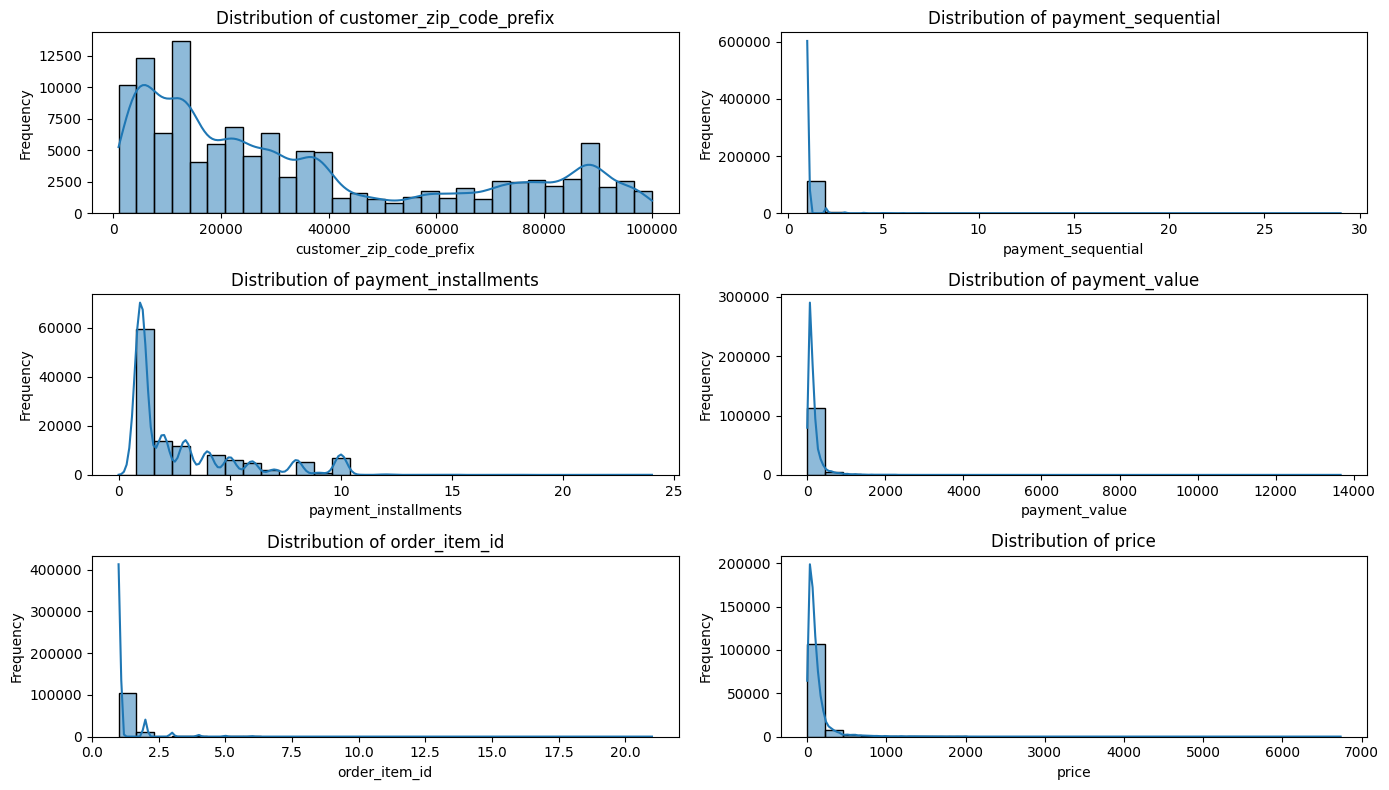

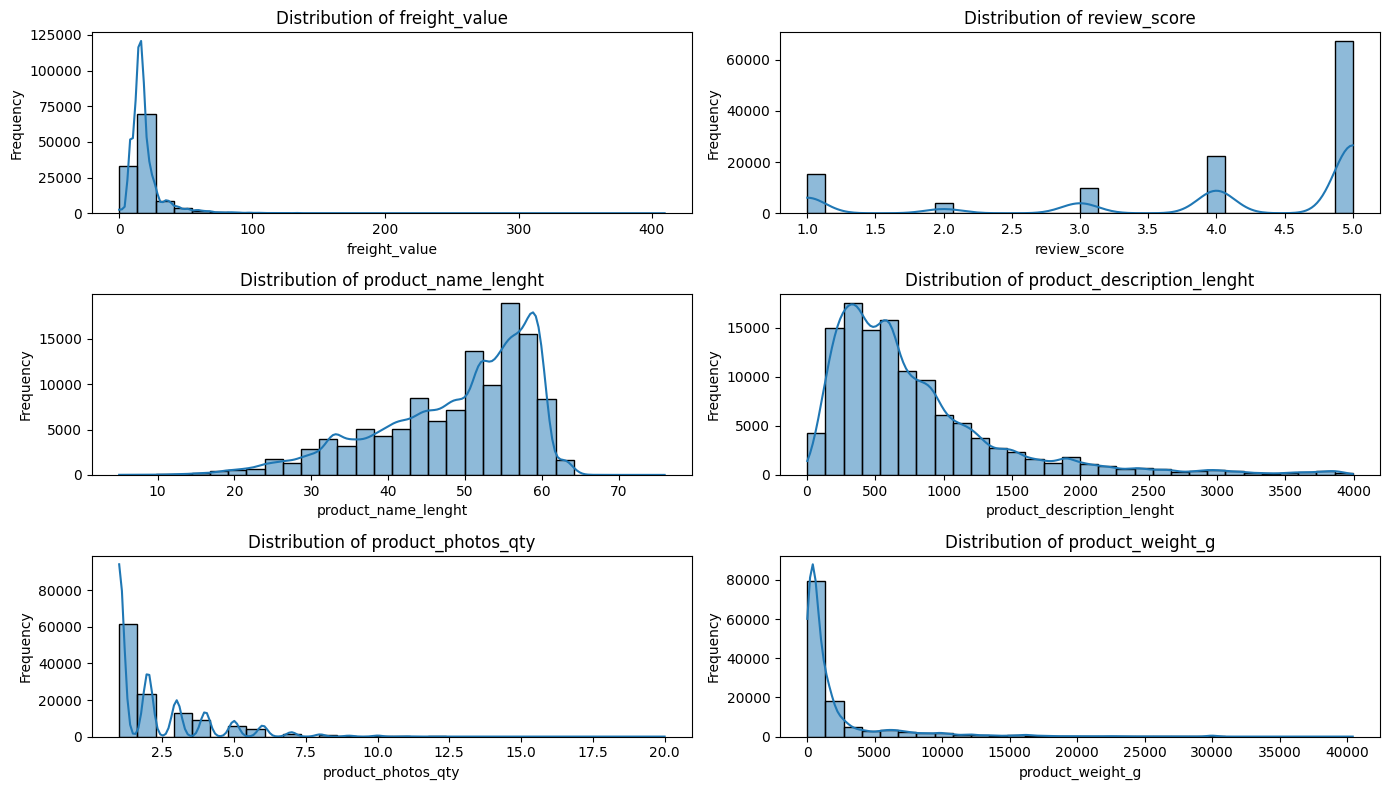

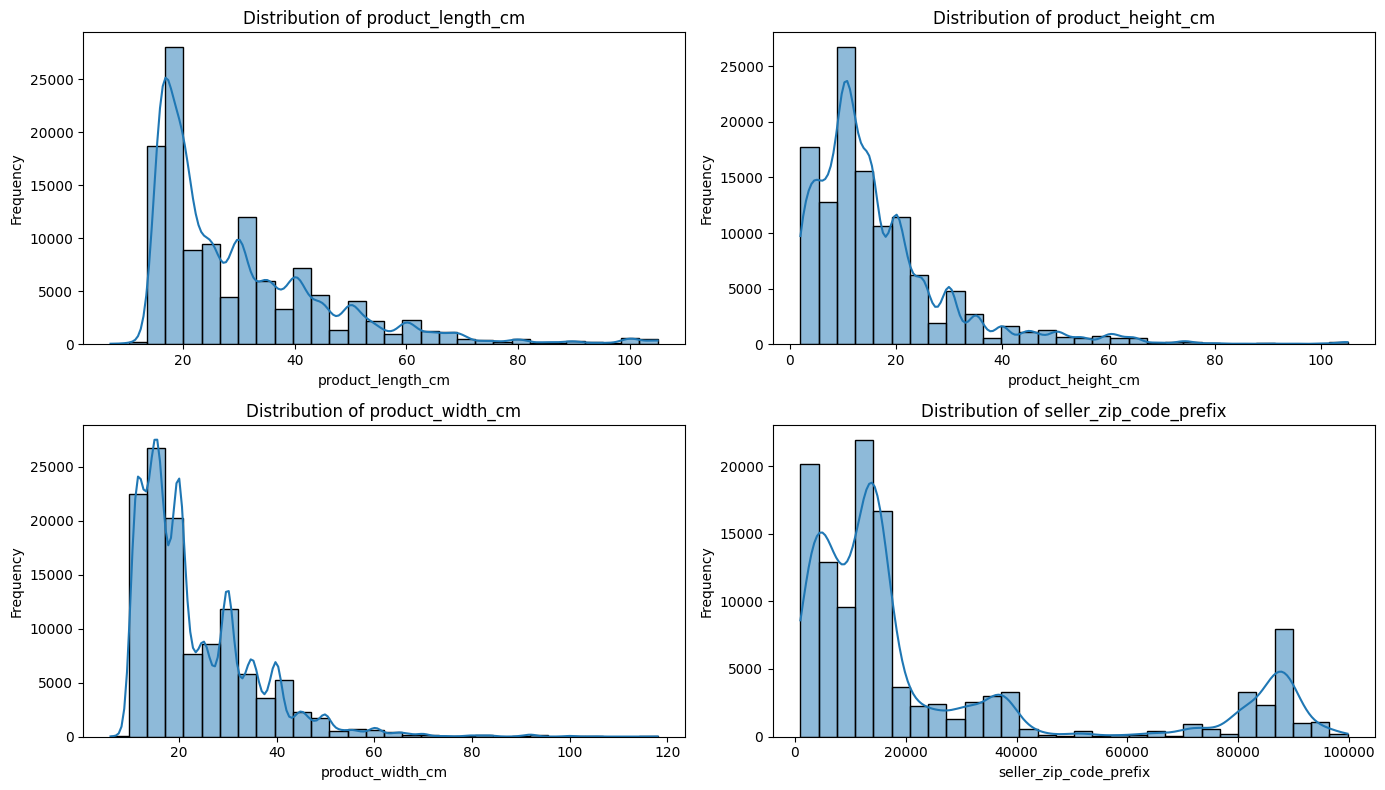

In [ ]:
# Define numerical columns
numerical_columns = final_merged_data.select_dtypes(include=['float64', 'int64']).columns

# Setting up the number of subplots (2 columns layout)
num_plots = len(numerical_columns)
rows = (num_plots + 1) // 2

# We will split the plots into smaller batches to avoid memory overload
batch_size = 6  # Plot 6 graphs at a time
num_batches = (num_plots + batch_size - 1) // batch_size  # Calculate the number of batches

for batch in range(num_batches):
    start = batch * batch_size
    end = min(start + batch_size, num_plots)

    # Create subplots for each batch
    fig, axes = plt.subplots((end - start + 1) // 2, 2, figsize=(14, 8))

    axes = axes.flatten()

    # Plot histograms for each numerical column in the current batch
    for i, col in enumerate(numerical_columns[start:end]):
        sns.histplot(final_merged_data[col], bins=30, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

    # Adjust layout and show the current batch
    plt.tight_layout()
    plt.show()

**Insight:**

Berikut adalah interpretasi dan analisis distribusi untuk masing-masing variabel berdasarkan histogram yang diberikan:

1. **customer_zip_code_prefix**:
   - Distribusi kode pos pelanggan menunjukkan distribusi yang sangat bervariasi. Sebagian besar pelanggan berada pada kisaran kode pos rendah, sementara kode pos yang lebih tinggi jumlahnya jauh lebih sedikit. Ini mengindikasikan bahwa sebagian besar pelanggan berasal dari area dengan kode pos yang lebih rendah.

2. **payment_sequential**:
   - Distribusi urutan pembayaran menunjukkan bahwa sebagian besar pesanan dilakukan dengan hanya satu transaksi pembayaran. Ada beberapa kasus dengan lebih dari satu transaksi, tetapi jumlahnya sangat kecil.

3. **payment_installments**:
   - Distribusi cicilan pembayaran menunjukkan pola menurun. Sebagian besar pelanggan memilih cicilan antara 0 hingga 3 kali. Semakin tinggi jumlah cicilan, semakin sedikit pelanggan yang memilih opsi tersebut, mengindikasikan bahwa cicilan lebih dari 5 kali jarang digunakan.

4. **payment_value**:
   - Sebagian besar nilai pembayaran berada di bawah angka yang cukup rendah, tetapi terdapat beberapa outlier dengan nilai pembayaran yang sangat tinggi. Ini menunjukkan bahwa sebagian besar transaksi bernilai rendah hingga sedang, sementara beberapa transaksi melibatkan pembayaran yang sangat tinggi.

5. **order_item_id**:
   - Sebagian besar pesanan hanya berisi satu item, sementara pesanan dengan lebih dari satu item jumlahnya jauh lebih sedikit. Ini mengindikasikan bahwa mayoritas pesanan berisi satu produk.

6. **price**:
   - Distribusi harga produk menunjukkan bahwa sebagian besar produk dihargai di bawah angka tertentu, dengan sedikit produk yang memiliki harga sangat tinggi. Ada distribusi ekor panjang di sisi harga tinggi.

7. **freight_value**:
   - Biaya pengiriman sebagian besar berada pada nilai yang relatif rendah, dengan distribusi menurun tajam untuk biaya yang lebih tinggi. Ini menunjukkan bahwa mayoritas pengiriman dikenai biaya pengiriman yang rendah hingga sedang.

8. **review_score**:
   - Skor ulasan menunjukkan distribusi bimodal, dengan puncak pada skor 1 dan 5. Ini menunjukkan bahwa pelanggan cenderung memberikan ulasan yang sangat positif atau sangat negatif, sementara ulasan dengan skor menengah lebih jarang.

9. **product_name_lenght**:
   - Panjang nama produk sebagian besar berada pada kisaran menengah, dengan beberapa produk memiliki nama yang sangat pendek atau sangat panjang. Ini menunjukkan bahwa mayoritas produk memiliki nama dengan panjang yang moderat.

10. **product_description_length**:
    - Panjang deskripsi produk menunjukkan distribusi yang cukup merata, dengan beberapa produk memiliki deskripsi yang sangat panjang. Ini mengindikasikan bahwa ada produk dengan deskripsi sangat singkat dan yang sangat detail.

11. **product_photos_qty**:
    - Sebagian besar produk hanya memiliki satu atau dua foto, dengan beberapa produk yang memiliki lebih banyak foto. Hal ini menunjukkan bahwa mayoritas produk hanya disertai dengan sedikit visual pendukung.

12. **product_weight_g**:
    - Berat produk menunjukkan distribusi dengan ekor panjang. Sebagian besar produk memiliki berat yang relatif rendah, sementara beberapa produk memiliki berat yang sangat tinggi.

13. **product_length_cm**:
    - Sebagian besar produk memiliki panjang di bawah 30 cm, dengan distribusi yang menurun untuk produk yang lebih panjang. Ini menunjukkan bahwa mayoritas produk berukuran kecil hingga sedang.

14. **product_height_cm**:
    - Tinggi produk juga menunjukkan pola serupa, di mana sebagian besar produk memiliki tinggi di bawah 30 cm. Produk yang lebih tinggi lebih jarang ditemukan.

15. **product_width_cm**:
    - Distribusi lebar produk mirip dengan distribusi panjang dan tinggi, dengan mayoritas produk memiliki lebar di bawah 30 cm.

16. **seller_zip_code_prefix**:
    - Distribusi kode pos penjual menunjukkan pola yang mirip dengan pelanggan, dengan mayoritas penjual berada di area dengan kode pos lebih rendah, dan sedikit penjual yang berada di area dengan kode pos yang lebih tinggi.

### Heatmap Correlation

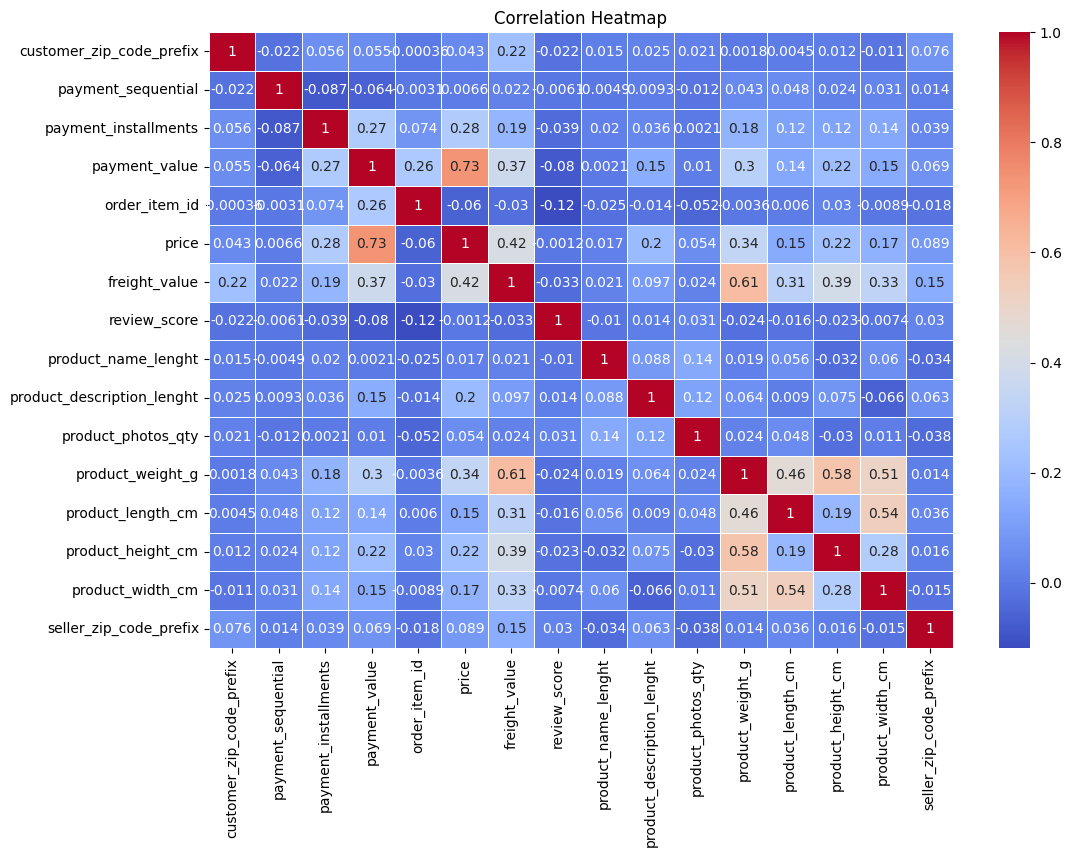

In [ ]:
plt.figure(figsize=(12, 8))
correlation_matrix = final_merged_data[numerical_columns].corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Insight:**

Berdasarkan grafik **heatmap** di atas, berikut adalah interpretasi dan analisis korelasi antara variabel-variabel dalam dataset:

1. **price dengan payment_value**:
   - Korelasi positif yang kuat (**0.73**), menunjukkan bahwa semakin tinggi harga produk, semakin tinggi pula nilai pembayaran yang harus dilakukan oleh pelanggan. Ini adalah korelasi yang wajar mengingat nilai pembayaran umumnya bergantung pada harga produk.

2. **product_weight_g dengan freight_value**:
   - Korelasi positif yang signifikan (**0.61**), menunjukkan bahwa semakin berat suatu produk, semakin tinggi biaya pengirimannya. Hal ini dapat dipahami karena biaya pengiriman seringkali terkait dengan berat produk.

3. **product_weight_g dengan product_length_cm, product_height_cm, dan product_width_cm**:
   - Korelasi kuat antara berat produk dengan dimensi fisiknya: panjang (**0.46**), tinggi (**0.58**), dan lebar (**0.54**). Ini mengindikasikan bahwa semakin besar dimensi produk, semakin berat produk tersebut.

4. **price dengan freight_value**:
   - Korelasi moderat (**0.34**), menunjukkan bahwa produk yang lebih mahal cenderung memiliki biaya pengiriman yang lebih tinggi, meskipun korelasinya tidak sekuat antara berat produk dengan biaya pengiriman.

5. **product_length_cm dengan product_width_cm dan product_height_cm**:
   - Korelasi yang cukup kuat antara dimensi panjang dan lebar (**0.54**) serta panjang dan tinggi (**0.46**). Ini menunjukkan bahwa dimensi produk secara umum saling berkorelasi, yang berarti produk yang panjang cenderung juga memiliki lebar dan tinggi yang proporsional.

6. **review_score dengan variabel lainnya**:
   - Skor ulasan (**review_score**) tidak menunjukkan korelasi yang kuat dengan variabel lainnya, yang menunjukkan bahwa skor ulasan lebih dipengaruhi oleh faktor-faktor subjektif pelanggan daripada atribut produk seperti harga atau dimensi fisik.

### Kesimpulan:

- Variabel-variabel yang memiliki korelasi kuat dalam dataset ini adalah **price** dengan **payment_value**, **product_weight_g** dengan **freight_value**, dan korelasi antara dimensi fisik produk (**product_length_cm**, **product_width_cm**, **product_height_cm**) dengan **product_weight_g**. Korelasi ini wajar dan memberikan pemahaman yang lebih baik tentang bagaimana atribut-atribut produk terkait satu sama lain dan pengaruhnya terhadap biaya serta nilai pembayaran.


## Visualization & Explanatory Analysis

### Pertanyaan 1:Produk kategori apa yang memiliki tingkat permintaan tertinggi, dan bagaimana pola pembeliannya secara geografis?

In [ ]:
# Merging product data with order data to identify product categories and their locations (city or state instead of zipcode)
merged_data = pd.merge(final_merged_data, product_category_name_translation, on='product_category_name', how='left')

# Counting the number of orders by product category
category_demand = merged_data['product_category_name_english'].value_counts().reset_index()
category_demand.columns = ['Product Category', 'Order Count']

# Grouping the data by product category and customer state for further analysis
geo_demand = merged_data.groupby(['product_category_name_english', 'customer_state']).size().reset_index(name='Order Count')

# Displaying results for the top categories with the highest demand
top_categories = category_demand.head()

# Displaying the geographic distribution for the top-demand product categories based on state
geo_top_categories = geo_demand[geo_demand['product_category_name_english'].isin(top_categories['Product Category'])]

top_categories


,Product Category,Order Count
0,bed_bath_table,14530
1,health_beauty,10032
2,sports_leisure,9004
3,furniture_decor,8832
4,computers_accessories,8150


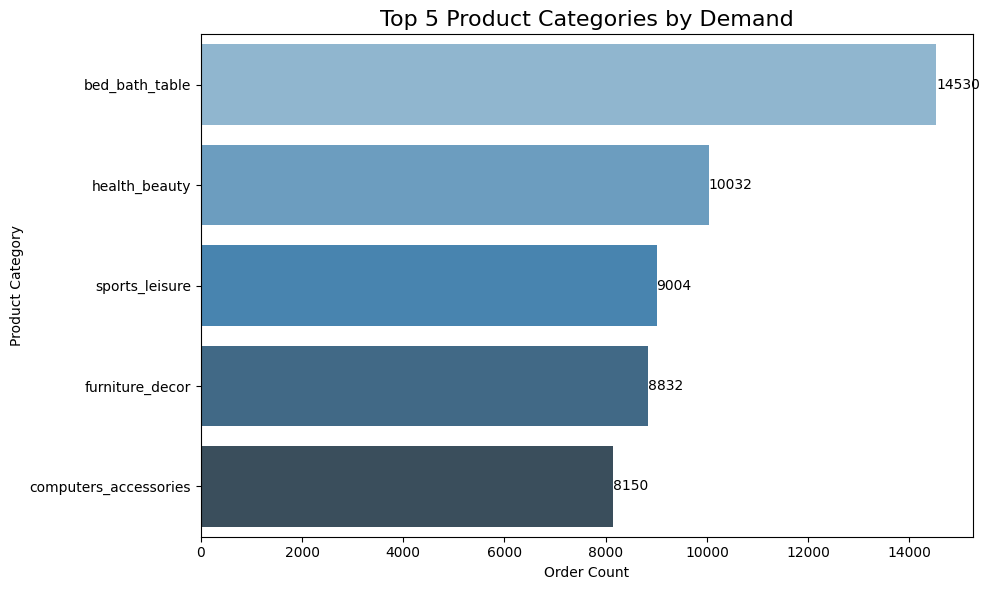

In [ ]:
# Importing necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Visualization 1: Barplot for Top 5 Product Categories by Demand with data labels
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Order Count', y='Product Category', data=top_categories, palette="Blues_d")
plt.title('Top 5 Product Categories by Demand', fontsize=16)
plt.xlabel('Order Count')
plt.ylabel('Product Category')

# Adding data labels
for index, value in enumerate(top_categories['Order Count']):
    barplot.text(value, index, f'{value}', va='center', ha='left', fontsize=10)

plt.tight_layout()
plt.show()

Berdasarkan grafik **Top 5 Product Categories by Demand** di atas, kategori produk dengan permintaan tertinggi adalah **bed_bath_table**, dengan jumlah pesanan sebanyak 14.530 pesanan. Ini menunjukkan bahwa produk-produk yang terkait dengan tempat tidur, kamar mandi, dan peralatan rumah tangga sangat populer di kalangan konsumen. Kategori produk lainnya yang juga memiliki permintaan tinggi adalah **health_beauty** dengan 10.032 pesanan, menunjukkan bahwa produk-produk kesehatan dan kecantikan juga merupakan segmen yang signifikan dalam pasar ini.

Selain itu, tiga kategori lain yang memiliki permintaan tinggi adalah **sports_leisure**, **furniture_decor**, dan **computers_accessories**, masing-masing dengan pesanan sebesar 9.004, 8.832, dan 8.150. Ini menunjukkan bahwa kategori produk yang berkaitan dengan gaya hidup aktif, dekorasi rumah, dan teknologi juga banyak diminati. Analisis ini dapat digunakan oleh bisnis untuk mengalokasikan sumber daya dan strategi pemasaran sesuai dengan permintaan pasar yang lebih tinggi pada kategori produk tertentu.



In [ ]:
geo_top_categories.sort_values(by='Order Count', ascending=False)

,product_category_name_english,customer_state,Order Count
162,bed_bath_table,SP,6777
811,health_beauty,SP,4348
1231,sports_leisure,SP,3831
727,furniture_decor,SP,3792
305,computers_accessories,SP,3267
...,...,...,...
137,bed_bath_table,AC,6
301,computers_accessories,RR,5
158,bed_bath_table,RR,5
704,furniture_decor,AM,4


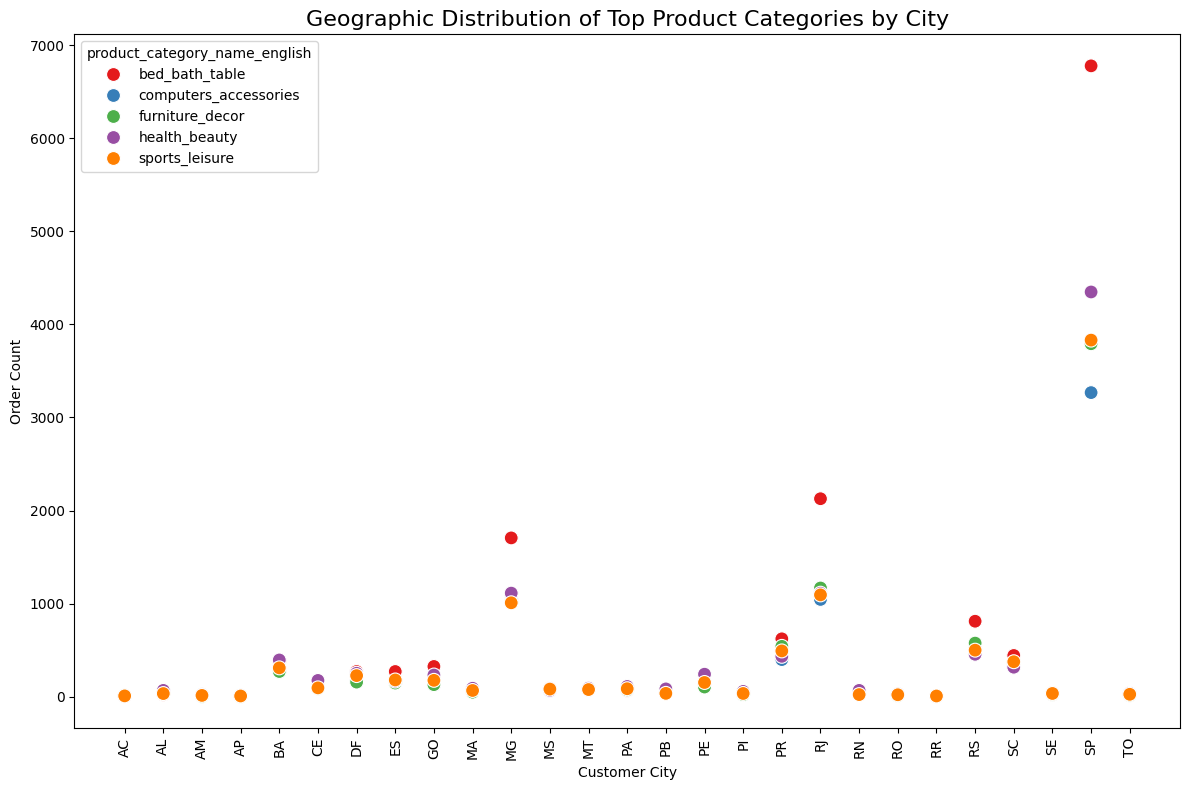

In [ ]:

# Visualization 2: Scatterplot for Geographic Distribution by City with data labels
plt.figure(figsize=(12, 8))
scatterplot = sns.scatterplot(x='customer_state', y='Order Count', hue='product_category_name_english',
                              data=geo_top_categories, palette="Set1", s=100)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adding chart title and labels
plt.title('Geographic Distribution of Top Product Categories by City', fontsize=16)
plt.xlabel('Customer City')
plt.ylabel('Order Count')

plt.tight_layout()
plt.show()

Berdasarkan grafik **Geographic Distribution of Top Product Categories by City** di atas, dapat dilihat bahwa distribusi pesanan produk berdasarkan kota bervariasi, dengan beberapa kota menunjukkan pesanan yang jauh lebih tinggi daripada yang lain. Misalnya, beberapa kota di grafik memiliki titik-titik yang lebih besar, menunjukkan jumlah pesanan yang lebih tinggi untuk produk seperti **bed_bath_table** dan **health_beauty**. Hal ini menunjukkan bahwa kota-kota tertentu mungkin memiliki preferensi atau kebutuhan yang lebih besar terhadap kategori produk tertentu dibandingkan dengan kota lainnya.

### Pertanyaan 2:Bagaimana pola penggunaan metode pembayaran oleh pelanggan, dan apakah preferensi ini bervariasi berdasarkan demografi pelanggan?

In [ ]:
# Merge customer data with payment data to analyze payment method usage based on demographics
payment_demographics_data = pd.merge(final_merged_data[['customer_id', 'customer_city', 'customer_state', 'payment_type', 'payment_value']],
                                     customers_dataset[['customer_id', 'customer_city', 'customer_state']],
                                     on='customer_id', how='left')

# Calculate overall payment method preferences
payment_preferences = payment_demographics_data['payment_type'].value_counts().reset_index()
payment_preferences.columns = ['Payment Type', 'Count']

# Calculate payment method preferences by state
payment_by_state = payment_demographics_data.groupby(['customer_state_x', 'payment_type']).size().reset_index(name='Count')

# Calculate payment method preferences by city
payment_by_city = payment_demographics_data.groupby(['customer_city_x', 'payment_type']).size().reset_index(name='Count')

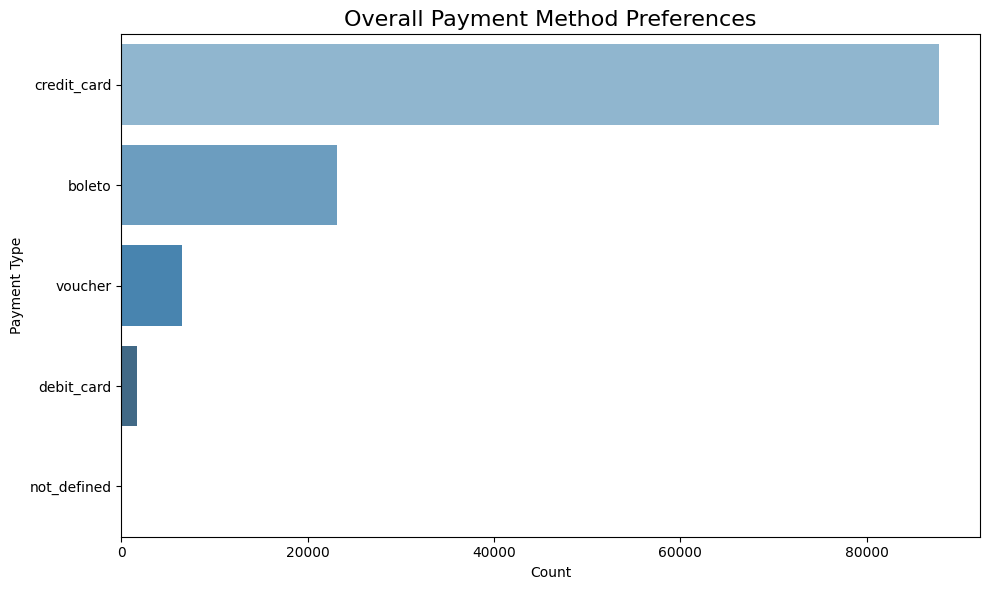

In [ ]:
# Visualization 1: Overall payment method preferences
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Payment Type', data=payment_preferences, palette="Blues_d")
plt.title('Overall Payment Method Preferences', fontsize=16)
plt.xlabel('Count')
plt.ylabel('Payment Type')
plt.tight_layout()
plt.show()

Berdasarkan grafik **Overall Payment Method Preferences** di atas, metode pembayaran yang paling banyak digunakan oleh pelanggan adalah **credit_card** dengan jumlah yang jauh lebih tinggi dibandingkan metode lainnya. Hal ini menunjukkan bahwa mayoritas pelanggan lebih nyaman atau lebih memilih menggunakan kartu kredit sebagai metode pembayaran utama. Penggunaan metode **boleto** juga cukup signifikan, diikuti oleh **voucher**, namun penggunaannya jauh lebih rendah dibandingkan kartu kredit.

Selain itu, metode pembayaran **debit_card** dan **not_defined** digunakan dengan frekuensi yang sangat rendah. Ini bisa menandakan bahwa metode pembayaran tersebut tidak terlalu populer di kalangan pelanggan atau mungkin tidak banyak ditawarkan sebagai opsi pembayaran oleh penjual. Pemahaman ini dapat membantu bisnis dalam menyediakan lebih banyak opsi pembayaran yang disukai pelanggan.

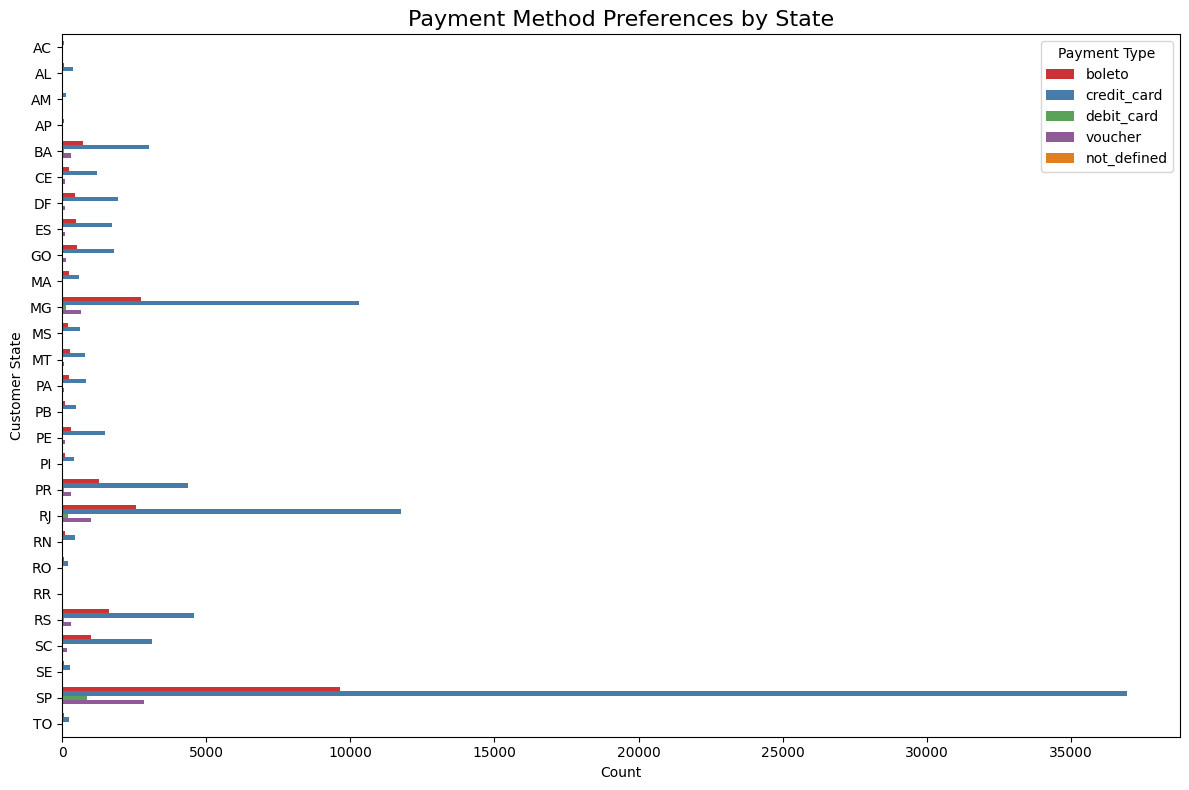

In [ ]:
# Visualization 2: Payment method preferences by state
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='customer_state_x', hue='payment_type', data=payment_by_state, palette="Set1")
plt.title('Payment Method Preferences by State', fontsize=16)
plt.xlabel('Count')
plt.ylabel('Customer State')
plt.legend(title='Payment Type')
plt.tight_layout()
plt.show()

Berdasarkan grafik **Payment Method Preferences by State** di atas, preferensi metode pembayaran bervariasi tergantung pada wilayah geografis (state). Misalnya, penggunaan **credit_card** mendominasi di hampir semua state, terutama di **SP (São Paulo)** dan **MG (Minas Gerais)**, yang merupakan area dengan volume transaksi tertinggi. Di sisi lain, penggunaan **boleto** juga terlihat cukup tinggi di beberapa wilayah seperti **SP** dan **RJ (Rio de Janeiro)**, meskipun tetap berada di bawah penggunaan kartu kredit.

Variasi dalam preferensi pembayaran ini menunjukkan adanya perbedaan demografis yang mempengaruhi preferensi metode pembayaran di berbagai state. Misalnya, wilayah dengan ekonomi yang lebih maju mungkin lebih banyak menggunakan kartu kredit, sementara wilayah lain mungkin lebih bergantung pada metode seperti **boleto**.

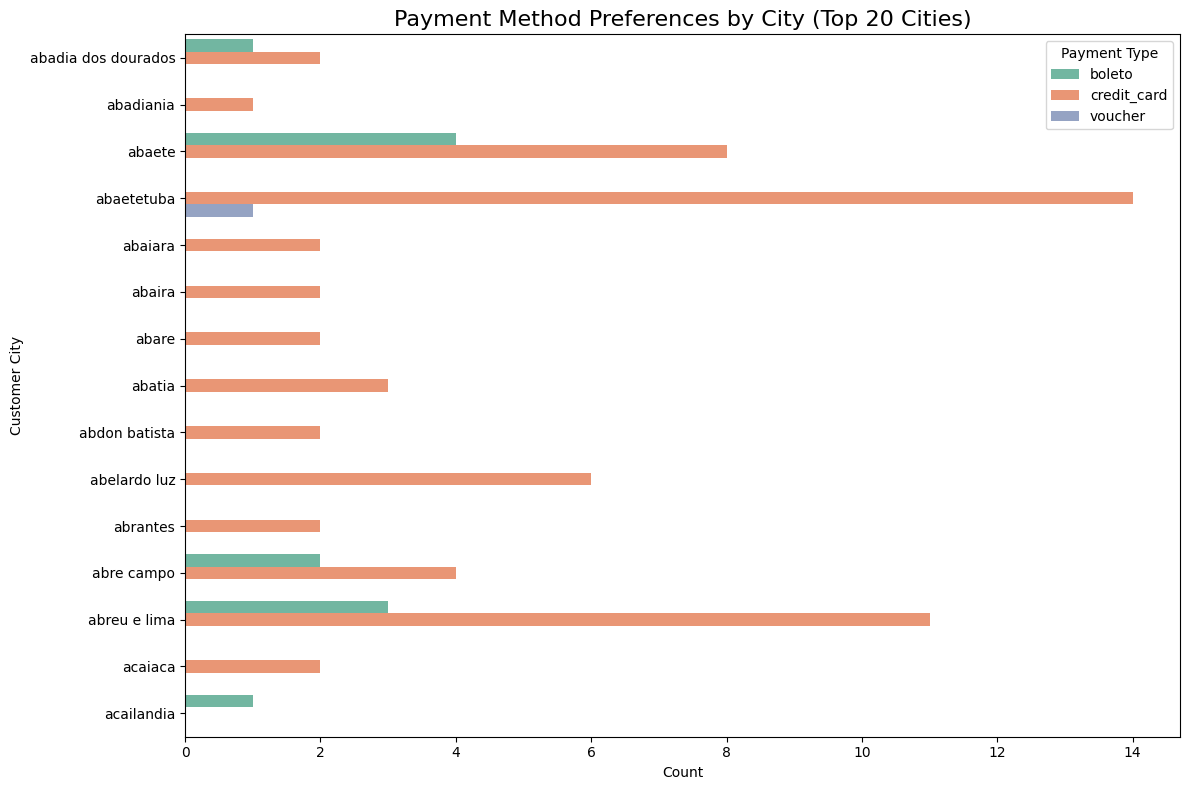

In [ ]:
# Visualization 3: Payment method preferences by city (optional)
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='customer_city_x', hue='payment_type', data=payment_by_city.head(20), palette="Set2")
plt.title('Payment Method Preferences by City (Top 20 Cities)', fontsize=16)
plt.xlabel('Count')
plt.ylabel('Customer City')
plt.legend(title='Payment Type')
plt.tight_layout()
plt.show()

Berdasarkan grafik **Payment Method Preferences by City (Top 20 Cities)** di atas, preferensi metode pembayaran juga bervariasi di tingkat kota. Di beberapa kota, metode **credit_card** digunakan secara dominan, sedangkan di kota lain seperti **abaetetuba**, **boleto** memiliki tingkat penggunaan yang lebih tinggi dibandingkan metode lain. Hal ini dapat mengindikasikan variasi dalam akses atau preferensi lokal terhadap metode pembayaran tertentu.

Selain itu, terdapat beberapa kota yang menunjukkan distribusi yang lebih seimbang antara **credit_card**, **boleto**, dan **voucher**, menunjukkan bahwa di beberapa kota, pelanggan lebih bervariasi dalam pilihan metode pembayarannya. Analisis ini penting untuk memahami tren lokal dan menyesuaikan strategi bisnis dan penawaran pembayaran di berbagai kota.

## Analisis Lanjutan (Opsional)

In [ ]:
# Merge necessary datasets for clustering
orders_customers = pd.merge(orders_dataset, customers_dataset, on='customer_id', how='left')
orders_payments = pd.merge(orders_customers, order_payments_dataset, on='order_id', how='left')
orders_items = pd.merge(orders_payments, order_items_dataset, on='order_id', how='left')

# Calculate Q1 and Q3 for payment_value
q1 = orders_items['payment_value'].quantile(0.25)
q3 = orders_items['payment_value'].quantile(0.75)

# Define rules for clustering based on payment_value quartiles
def customer_segment_clustering(row):
    if row['payment_value'] < q1:
        return 'Low Spend'
    elif q1 <= row['payment_value'] <= q3:
        return 'Medium Spend'
    elif row['payment_value'] > q3:
        return 'High Spend'

# Apply rule-based clustering based on customer spending segments
orders_items['cluster'] = orders_items.apply(customer_segment_clustering, axis=1)

# Show the resulting clustered data
clustered_data = orders_items[['order_id', 'customer_id', 'payment_value', 'cluster']]
clustered_data.head()

,order_id,customer_id,payment_value,cluster
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,18.12,Low Spend
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2.00,Low Spend
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,18.59,Low Spend
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,141.46,Medium Spend
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,179.12,Medium Spend


In [ ]:
# Count the number of orders per cluster
cluster_counts = clustered_data['cluster'].value_counts().reset_index()
cluster_counts.columns = ['Cluster', 'Number of Orders']
cluster_counts

,Cluster,Number of Orders
0,Medium Spend,59224
1,High Spend,29608
2,Low Spend,29599


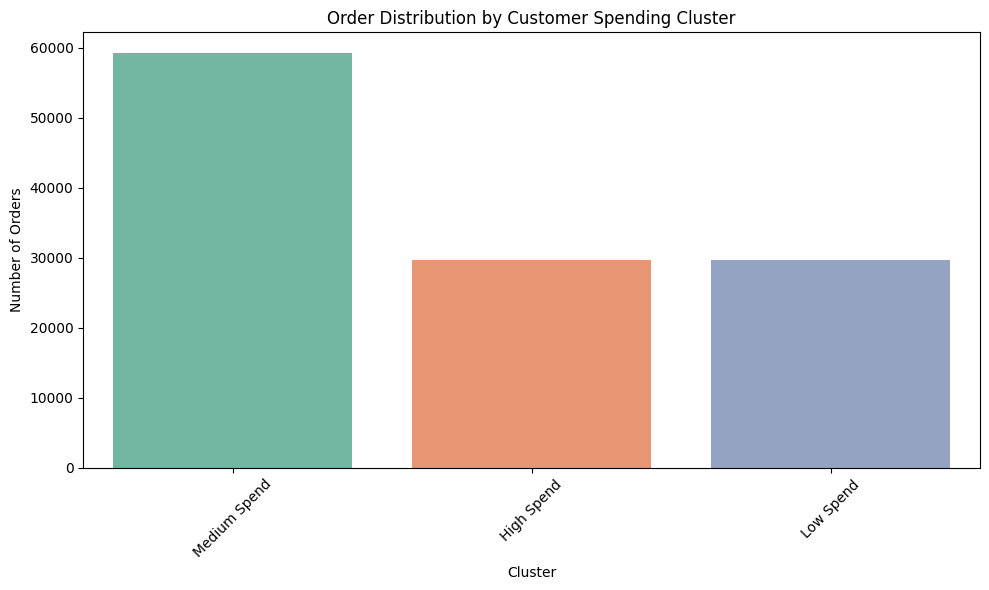

In [ ]:
# Plot the clusters
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='Number of Orders', data=cluster_counts, palette="Set2")
plt.title('Order Distribution by Customer Spending Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Berdasarkan grafik **Order Distribution by Customer Spending Cluster** di atas, kita dapat melihat bahwa mayoritas pesanan berasal dari kelompok **Medium Spend**, dengan jumlah pesanan mencapai lebih dari 59.000. Ini menunjukkan bahwa sebagian besar pelanggan mengeluarkan uang dalam rentang menengah untuk pesanan mereka, sesuai dengan nilai antara kuartil pertama (Q1) dan kuartil ketiga (Q3) dari distribusi nilai pembayaran. Kelompok pelanggan **High Spend**, yaitu pelanggan yang mengeluarkan jumlah lebih tinggi dari Q3, memiliki sekitar 29.600 pesanan, sementara kelompok **Low Spend**, dengan nilai pembayaran di bawah Q1, menyumbang sekitar 29.500 pesanan.

Analisis ini mengindikasikan bahwa sebagian besar transaksi berada di kelompok pelanggan menengah, sementara terdapat keseimbangan relatif antara jumlah pesanan dari pelanggan berpengeluaran tinggi dan rendah. Ini menunjukkan bahwa perusahaan mungkin perlu menargetkan strategi yang lebih fokus pada kelompok **High Spend** untuk meningkatkan loyalitas dan nilai pesanan mereka, sementara tetap mempertahankan kelompok **Medium Spend** sebagai basis pelanggan utama.

## Conclusion

Conclusion for Question 1: **"Produk kategori apa yang memiliki tingkat permintaan tertinggi, dan bagaimana pola pembeliannya secara geografis?"**

- Berdasarkan analisis, kategori produk dengan tingkat permintaan tertinggi adalah **bed_bath_table**, diikuti oleh **health_beauty**, **sports_leisure**, **furniture_decor**, dan **computers_accessories**. Ini menunjukkan bahwa produk-produk yang berkaitan dengan kebutuhan rumah tangga dan perawatan diri menjadi favorit di kalangan pelanggan. Analisis geografis lebih lanjut menunjukkan bahwa distribusi permintaan bervariasi di berbagai wilayah, dengan beberapa kota atau state menunjukkan tingkat permintaan yang lebih tinggi untuk kategori tertentu. Hal ini menunjukkan bahwa preferensi pelanggan untuk produk tertentu dipengaruhi oleh faktor-faktor geografis, yang dapat digunakan oleh bisnis untuk mengoptimalkan strategi distribusi dan pemasaran mereka.

Conclusion for Question 2: **"Bagaimana pola penggunaan metode pembayaran oleh pelanggan, dan apakah preferensi ini bervariasi berdasarkan demografi pelanggan?"**

- Analisis terhadap pola penggunaan metode pembayaran menunjukkan bahwa **credit_card** adalah metode pembayaran yang paling populer di kalangan pelanggan, diikuti oleh **boleto**. Namun, preferensi ini bervariasi berdasarkan wilayah geografis. Di beberapa state seperti **São Paulo (SP)** dan **Minas Gerais (MG)**, kartu kredit mendominasi, sedangkan **boleto** lebih sering digunakan di wilayah lain. Pada tingkat kota, variasi dalam preferensi metode pembayaran lebih jelas, dengan beberapa kota menunjukkan preferensi yang lebih kuat untuk **boleto** dibandingkan **credit_card**. Hal ini menunjukkan bahwa faktor demografi, termasuk wilayah geografis, mempengaruhi preferensi metode pembayaran, yang dapat menjadi acuan bagi bisnis dalam menyediakan opsi pembayaran yang sesuai dengan preferensi lokal.